### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
ratings = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

In [3]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user.head()
print(user['user id'].count())
user2 = user.groupby(['gender']).nunique()
user2.drop(['age', 'occupation', 'zip code'], axis=1, inplace=True)
user2

943


,user id
gender,
F,273
M,670


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [7]:
movie.shape

(1681, 22)

In [8]:
movie.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [11]:
ratings.shape

(100000, 4)

In [12]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [14]:
user.shape

(943, 5)

In [15]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


#### Based on the above info, all three datasets have no missing values.

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [16]:
genre = movie.copy()
genre.head()

genre2 = genre.drop(['movie title', 'movie id', 'unknown', 'release date'], axis=1).sum()
genre2

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [17]:
movie['unknown'].any()

True

In [18]:
movie[movie['unknown'] == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
movie.drop(movie[movie.unknown == 1].index, inplace=True)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [20]:
# Dropping rows to create new dataframe

genre2 = genre.drop(['movie id', 'release date', 'unknown'], axis=1)

# Creating new column with number of genres for each movie

genre2['Genres'] = genre2.sum(axis=1)

# Setting indexes as movie titles

genre2.set_index('movie title', inplace=True)

# Dropping all columns except new "Genres" column

genre2.drop(genre2.iloc[:, 0:-1], inplace=True, axis=1)

# Dropping all rows with titles having less than 2 genres

genre2.drop(genre2[genre2.Genres < 2].index, inplace=True)

genre2.sort_values(by='Genres', ascending=False)

#genre2['Genres'].count()

,Genres
movie title,
"Transformers: The Movie, The",6
"Empire Strikes Back, The",6
"Kid in King Arthur's Court, A",6
Hercules,5
Star Wars,5
...,...
"Piano, The",2
Romeo Is Bleeding,2
"Secret Garden, The",2


In [21]:
rows = len(genre2['Genres'])

print("Total number of movies which have more than one genre: ", rows)

Total number of movies which have more than one genre:  847


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [22]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [23]:
movie2 = movie.copy()

movie2['release date'] = movie2['release date'].apply(lambda x: x.split('-')[2])

In [24]:
movie2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [26]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


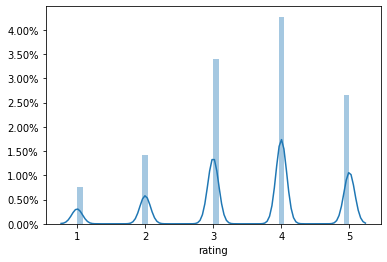

In [27]:
import matplotlib.ticker as mtick

perc = np.linspace(0,100,len(ratings['rating']))

ax = sb.distplot(ratings['rating'])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

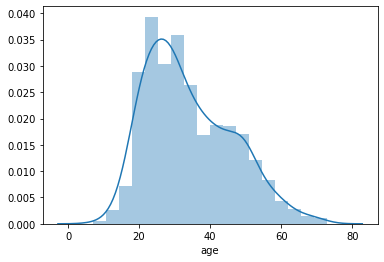

In [28]:
sb.distplot(user['age']);

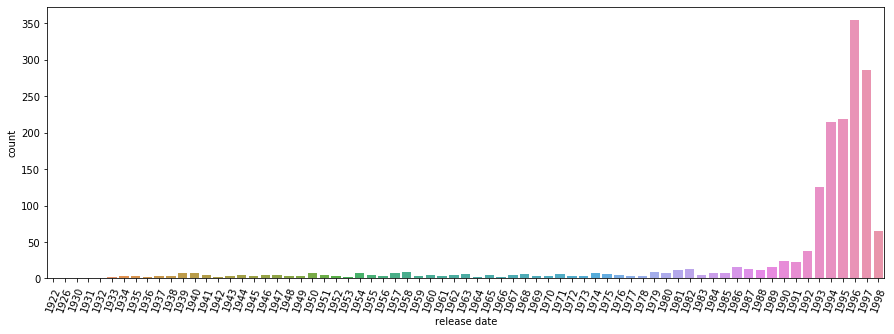

In [29]:
plt.figure(figsize=(15,5));
ax = sb.countplot(movie2['release date']);
plt.xticks(rotation=70);

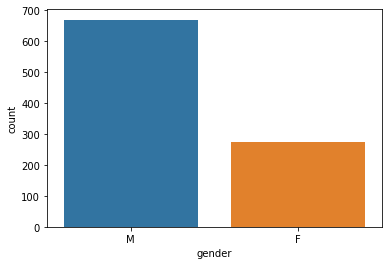

In [30]:
ax = sb.countplot(x = user['gender'])

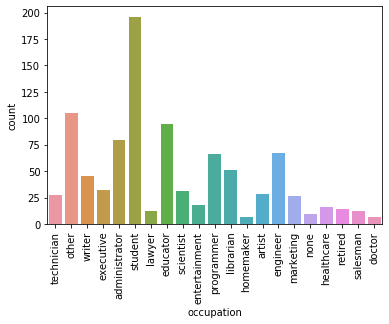

In [31]:
ax = sb.countplot(user['occupation']);
plt.xticks(rotation='vertical');

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [32]:
pop = movie2.copy()

In [33]:
pop.drop(['movie id', 'movie title', 'unknown'], axis=1, inplace=True)

In [34]:
pop = pop.groupby(['release date']).sum()
pop

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [35]:
pop['total'] = pop.sum(axis=1)

In [36]:
pop = pop.div(pop['total'], axis=0) * 100

columns = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

pop2 = pop[columns]
pop2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date,,,,,,,,,,,,,,,,,,
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782


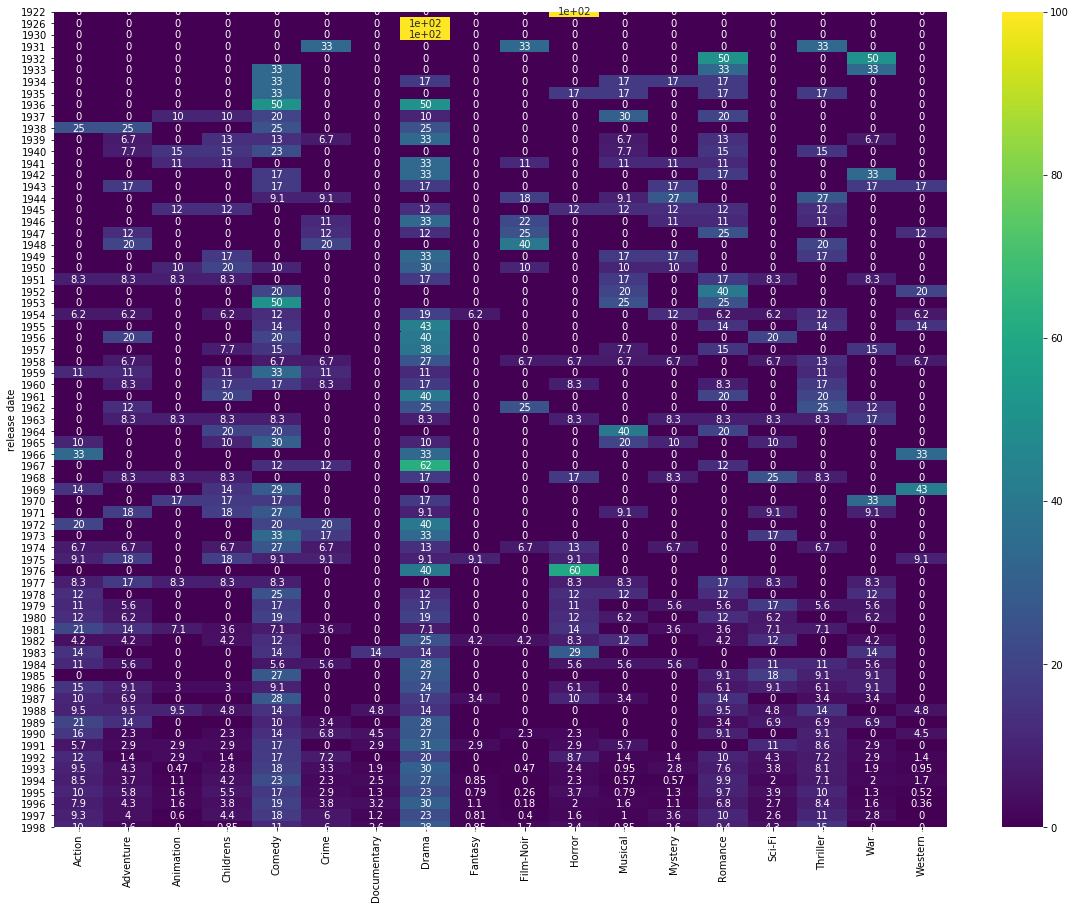

In [37]:
fig, ax = plt.subplots(figsize=(20,15))

sb.heatmap(pop2, cmap='viridis', annot=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [38]:
# Merging the movie and ratings dataframes

top = pd.merge(movie, ratings, how='inner', on='movie id')

# Dropping extra columns

top.drop(['release date', 'unknown'], axis=1, inplace=True)
top.drop(top.iloc[:, 2:-3], axis=1, inplace=True)
top

,movie id,movie title,user id,rating,timestamp
0,1,Toy Story,308,4,887736532
1,1,Toy Story,287,5,875334088
2,1,Toy Story,148,4,877019411
3,1,Toy Story,280,4,891700426
4,1,Toy Story,66,3,883601324
...,...,...,...,...,...
99985,1678,Mat' i syn,863,1,889289570
99986,1679,B. Monkey,863,3,889289491
99987,1680,Sliding Doors,863,2,889289570
99988,1681,You So Crazy,896,3,887160722


In [39]:
# Calling groupby on 'movie title' column and counting # of ratings per movie

rating_count = top.groupby(['movie title']).count()

# Dropping extra columns

rating_count.drop(['user id', 'timestamp'], axis=1, inplace=True)
rating_count.drop(['movie id'], axis=1, inplace=True)

rating_count

,rating
movie title,
'Til There Was You,9
1-900,5
101 Dalmatians,109
12 Angry Men,125
187,41
...,...
Young Guns,101
Young Guns II,44
"Young Poisoner's Handbook, The",41


In [40]:
# Averaging ratings for each movie

average = top.groupby(['movie title']).mean()
average

,movie id,user id,rating,timestamp
movie title,,,,
'Til There Was You,1300.0,383.777778,2.333333,8.861152e+08
1-900,1353.0,477.000000,2.600000,8.797260e+08
101 Dalmatians,225.0,450.330275,2.908257,8.829281e+08
12 Angry Men,178.0,453.552000,4.344000,8.828963e+08
187,330.0,517.097561,3.024390,8.850084e+08
...,...,...,...,...
Young Guns,232.0,456.168317,3.207921,8.835963e+08
Young Guns II,1188.0,504.068182,2.772727,8.821855e+08
"Young Poisoner's Handbook, The",547.0,452.487805,3.341463,8.821438e+08


In [41]:
# Slicing movies with more than 100 ratings

hundred = rating_count[rating_count['rating'] > 100]
hundred

,rating
movie title,
101 Dalmatians,109
12 Angry Men,125
2001: A Space Odyssey,259
Absolute Power,127
"Abyss, The",151
...,...
Willy Wonka and the Chocolate Factory,326
"Wizard of Oz, The",246
"Wrong Trousers, The",118


In [42]:
hundred_mean = hundred.merge(average, how='left', on='movie title')

In [43]:
hundred_mean

,rating_x,movie id,user id,rating_y,timestamp
movie title,,,,,
101 Dalmatians,109,225.0,450.330275,2.908257,8.829281e+08
12 Angry Men,125,178.0,453.552000,4.344000,8.828963e+08
2001: A Space Odyssey,259,135.0,460.965251,3.969112,8.828325e+08
Absolute Power,127,291.0,473.818898,3.370079,8.834037e+08
"Abyss, The",151,164.0,459.211921,3.589404,8.828725e+08
...,...,...,...,...,...
Willy Wonka and the Chocolate Factory,326,151.0,470.966258,3.631902,8.825180e+08
"Wizard of Oz, The",246,132.0,461.418699,4.077236,8.831850e+08
"Wrong Trousers, The",118,169.0,454.483051,4.466102,8.828888e+08


In [44]:
# Sorting movies so that highest rating is on top

hundred_mean = hundred_mean.sort_values(by='rating_y', ascending=False)

In [45]:
hundred_mean

,rating_x,movie id,user id,rating_y,timestamp
movie title,,,,,
"Close Shave, A",112,408.0,443.142857,4.491071,8.823304e+08
Schindler's List,298,318.0,469.714765,4.466443,8.834050e+08
"Wrong Trousers, The",118,169.0,454.483051,4.466102,8.828888e+08
Casablanca,243,483.0,471.831276,4.456790,8.834745e+08
"Shawshank Redemption, The",283,64.0,441.187279,4.445230,8.826119e+08
...,...,...,...,...,...
Spawn,143,358.0,496.097902,2.615385,8.836746e+08
Event Horizon,127,260.0,462.204724,2.574803,8.842682e+08
Crash,128,325.0,443.171875,2.546875,8.831109e+08


In [46]:
# Selecting the top 25 movies

print("The top 25 movies are:")
hundred_mean.head(25)

The top 25 movies are:


,rating_x,movie id,user id,rating_y,timestamp
movie title,,,,,
"Close Shave, A",112,408.0,443.142857,4.491071,8.823304e+08
Schindler's List,298,318.0,469.714765,4.466443,8.834050e+08
"Wrong Trousers, The",118,169.0,454.483051,4.466102,8.828888e+08
Casablanca,243,483.0,471.831276,4.456790,8.834745e+08
"Shawshank Redemption, The",283,64.0,441.187279,4.445230,8.826119e+08
Rear Window,209,603.0,468.650718,4.387560,8.837371e+08
"Usual Suspects, The",267,12.0,448.382022,4.385768,8.829016e+08
Star Wars,583,50.0,471.384220,4.358491,8.830261e+08
12 Angry Men,125,178.0,453.552000,4.344000,8.828963e+08


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [47]:
gender = pd.merge(user, ratings, how='inner', on='user id')
gender

,user id,age,gender,occupation,zip code,movie id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883
...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027
99996,943,22,M,student,77841,219,4,888639575
99997,943,22,M,student,77841,796,3,888640311
99998,943,22,M,student,77841,739,4,888639929


In [48]:
gender = pd.merge(gender, movie, how='inner', on='movie id')
gender

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,863,17,M,student,60089,1679,3,889289491,B. Monkey,06-Feb-1998,...,0,0,0,0,0,1,0,1,0,0
99986,863,17,M,student,60089,1678,1,889289570,Mat' i syn,06-Feb-1998,...,0,0,0,0,0,0,0,0,0,0
99987,863,17,M,student,60089,1680,2,889289570,Sliding Doors,01-Jan-1998,...,0,0,0,0,0,1,0,0,0,0
99988,896,28,M,writer,91505,1681,3,887160722,You So Crazy,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [89]:
gender_dummies = pd.get_dummies(gender, prefix='Gender', columns=['gender'])

gender2 = gender_dummies[['rating', 'Gender_M', 'Gender_F', 'Drama', 'Romance', 'Sci-Fi']]

gender_grouped = gender2.groupby(['Gender_M', 'Gender_F']).sum()

#gender_grouped.sum()

gender_grouped

,,rating,Drama,Romance,Sci-Fi
Gender_M,Gender_F,,,,
0,1,90894,11008,5858,2629
1,0,262060,28887,13603,10101


In [90]:
males_total = gender_dummies['Gender_M'].sum()
females_total = gender_dummies['Gender_F'].sum()

m_drama_pct = int(gender_grouped['Drama'][1]) / males_total
f_drama_pct = int(gender_grouped['Drama'][0]) / females_total

m_romance_pct = int(gender_grouped['Romance'][1]) / males_total
f_romance_pct = int(gender_grouped['Romance'][0]) / females_total

m_scifi_pct = int(gender_grouped['Sci-Fi'][1]) / males_total
f_scifi_pct = int(gender_grouped['Sci-Fi'][0]) / females_total

print(m_scifi_pct, f_scifi_pct)

0.13603673975111782 0.10214468878700754


In [91]:
if f_drama_pct < m_drama_pct:
    print("Men watch more drama than women.")
else:
    print("Women watch more drama than men.")
    
if f_romance_pct < m_romance_pct:
    print("Men watch more romance than women.")
else:
    print("Women watch more romance than men.")

if f_scifi_pct < m_scifi_pct:
    print("Men watch more sci-fi than women.")
else:
    print("Women watch more sci-fi than men.")

Women watch more drama than men.
Women watch more romance than men.
Men watch more sci-fi than women.
